In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import shap
import numpy as np

In [90]:
data_path = '../../../dataset/Synthetic_CV.csv'
df = pd.read_csv(data_path)

X = df.drop(columns=['cv_risk'])
y = df['cv_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=456)

rf = RandomForestRegressor(
        n_estimators=200,
        max_depth=20,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    )
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}") # Pretty Amazing!

Mean Squared Error: 0.09


DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x0000014E7B22BE60>


Global SHAP Score:


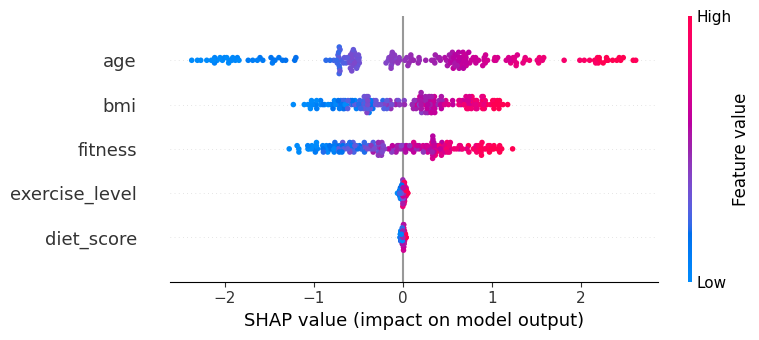

Average values for each column:
Column 0: 1.0101
Column 1: 0.0119
Column 2: 0.0173
Column 3: 0.5444
Column 4: 0.5322


In [91]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

print("Global SHAP Score:")
shap.summary_plot(shap_values, X_test)

column_averages = np.mean(np.abs(shap_values), axis=0)

print("Average values for each column:")
for i, avg in enumerate(column_averages):
    print(f"Column {i}: {avg:.4f}")

In [92]:
import pickle

file_path = '../../../result/SyntheticCV/Causal_SHAP_CV_42.pkl'

# Load the data
with open(file_path, 'rb') as f:
    phi_normalized_list = pickle.load(f)

sums = {}
counts = {}

for instance in phi_normalized_list:
    for feature, value in instance.items():
        sums[feature] = sums.get(feature, 0) + abs(value)
        counts[feature] = counts.get(feature, 0) + 1

means = {feature: sums[feature] / counts[feature] for feature in sums}

sorted_means = sorted(means.items(), key=lambda item: abs(item[1]), reverse=True)

causal_output_list = [(feature, mean_value) for feature, mean_value in sorted_means]

print(causal_output_list)


[('age', np.float64(1.3400069750143317)), ('bmi', np.float64(0.2504178918001364)), ('fitness', np.float64(0.23045080737843127)), ('diet_score', np.float64(0.06974439872310584)), ('exercise_level', np.float64(0.06697237590352084))]


DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x0000014E7AC97500>


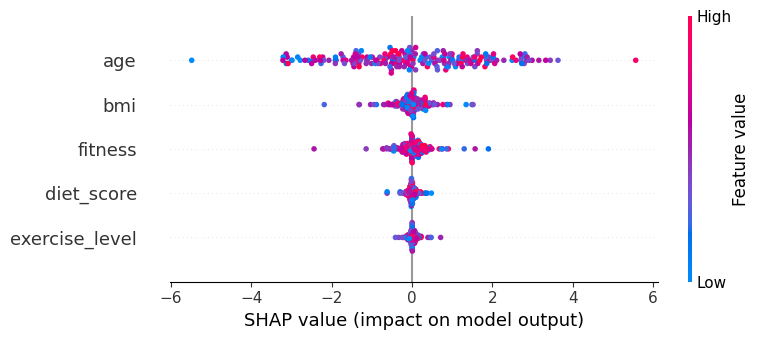

Average values for each column:
Column 0: 1.3400
Column 1: 0.0697
Column 2: 0.0670
Column 3: 0.2504
Column 4: 0.2305


In [93]:
phi_normalized_df = pd.DataFrame(phi_normalized_list)
phi_normalized_df = phi_normalized_df[X_test.columns]

shap.summary_plot(phi_normalized_df.values, X_test)

column_averages = np.mean(np.abs(phi_normalized_df.values), axis=0)

print("Average values for each column:")
for i, avg in enumerate(column_averages):
    print(f"Column {i}: {avg:.4f}")

In [94]:
data_path = '../../../dataset/Synthetic_CV.csv'
df = pd.read_csv(data_path)

X = df.drop(columns=['cv_risk','bmi','fitness'])
y = df['cv_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=456)

rf = RandomForestRegressor(
        n_estimators=200,
        max_depth=20,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    )
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}") # Pretty Amazing!

Mean Squared Error: 0.86


DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x0000014E786B3E00>


Global SHAP Score:


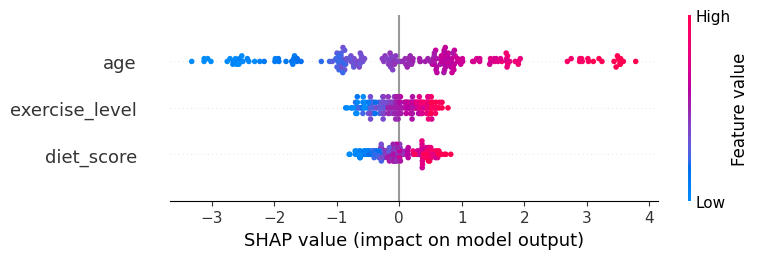

Average values for each column:
Column 0: 1.3060
Column 1: 0.3239
Column 2: 0.3334


In [95]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

print("Global SHAP Score:")
shap.summary_plot(shap_values, X_test)

column_averages = np.mean(np.abs(shap_values), axis=0)

print("Average values for each column:")
for i, avg in enumerate(column_averages):
    print(f"Column {i}: {avg:.4f}")